# Evolve a binary disrupted by an SN in `galax`
I can do this in `gala`, how does it look in `galax`?

In [1]:
import jax.numpy as jnp

import unxt as u
import coordinax as cx
import galax.coordinates as gc
import galax.dynamics as gd
import galax.potential as gp

In [2]:
# start at the sun
w = gc.PhaseSpaceCoordinate(
    q=u.Quantity([8, 0, 0], "kpc"),
    p=u.Quantity([0, 220, 0], "km/s"),
    t=u.Quantity(0, "Myr"),
)

In [3]:
pot = gp.MilkyWayPotential2022()

First the pre-SN orbit, we just integrate up to let's say 35 Myr

In [4]:
pre_SN_orbit = gd.evaluate_orbit(pot, w, u.Quantity(jnp.linspace(0, 35, 35), "Myr"))
w_SN = pre_SN_orbit[-1]

Now I want to add a kick to the velocity

In [7]:
# this doesn't work
w_SN.p += u.Quantity([100, 0, 40], "km/s")

RuntimeError: Refusing to materialise `CartesianVel3D`.

In [8]:
# this also doesn't work
kick = cx.CartesianVel3D(
    x = u.Quantity(100, "km/s"),
    y = u.Quantity(0, "km/s"),
    z = u.Quantity(40, "km/s"),
)
w_SN = gc.PhaseSpaceCoordinate(
    q=w_SN.q,
    p=w_SN.p + kick,
    t=w_SN.t,
)

ValueError: Mismatch custom node data: ('value',), ('unit',), (Unit("kpc / Myr"),) != ('value',), ('unit',), (Unit("km / s"),); value: Quantity['speed'](Array(40, dtype=int64, weak_type=True), unit='km / s').

In [5]:
# this finally does
kick = cx.CartesianVel3D(
    x = u.Quantity(100, "km/s").uconvert("kpc/Myr"),
    y = u.Quantity(0, "km/s").uconvert("kpc/Myr"),
    z = u.Quantity(40, "km/s").uconvert("kpc/Myr"),
)
w_SN = gc.PhaseSpaceCoordinate(
    q=w_SN.q,
    p=w_SN.p + kick,
    t=w_SN.t,
)

Now we can continue the orbit past the SN

In [6]:
post_SN_orbit = gd.evaluate_orbit(pot, w_SN, u.Quantity(jnp.linspace(35, 700, 1000), "Myr"))

In [14]:
import matplotlib.pyplot as plt

In [15]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

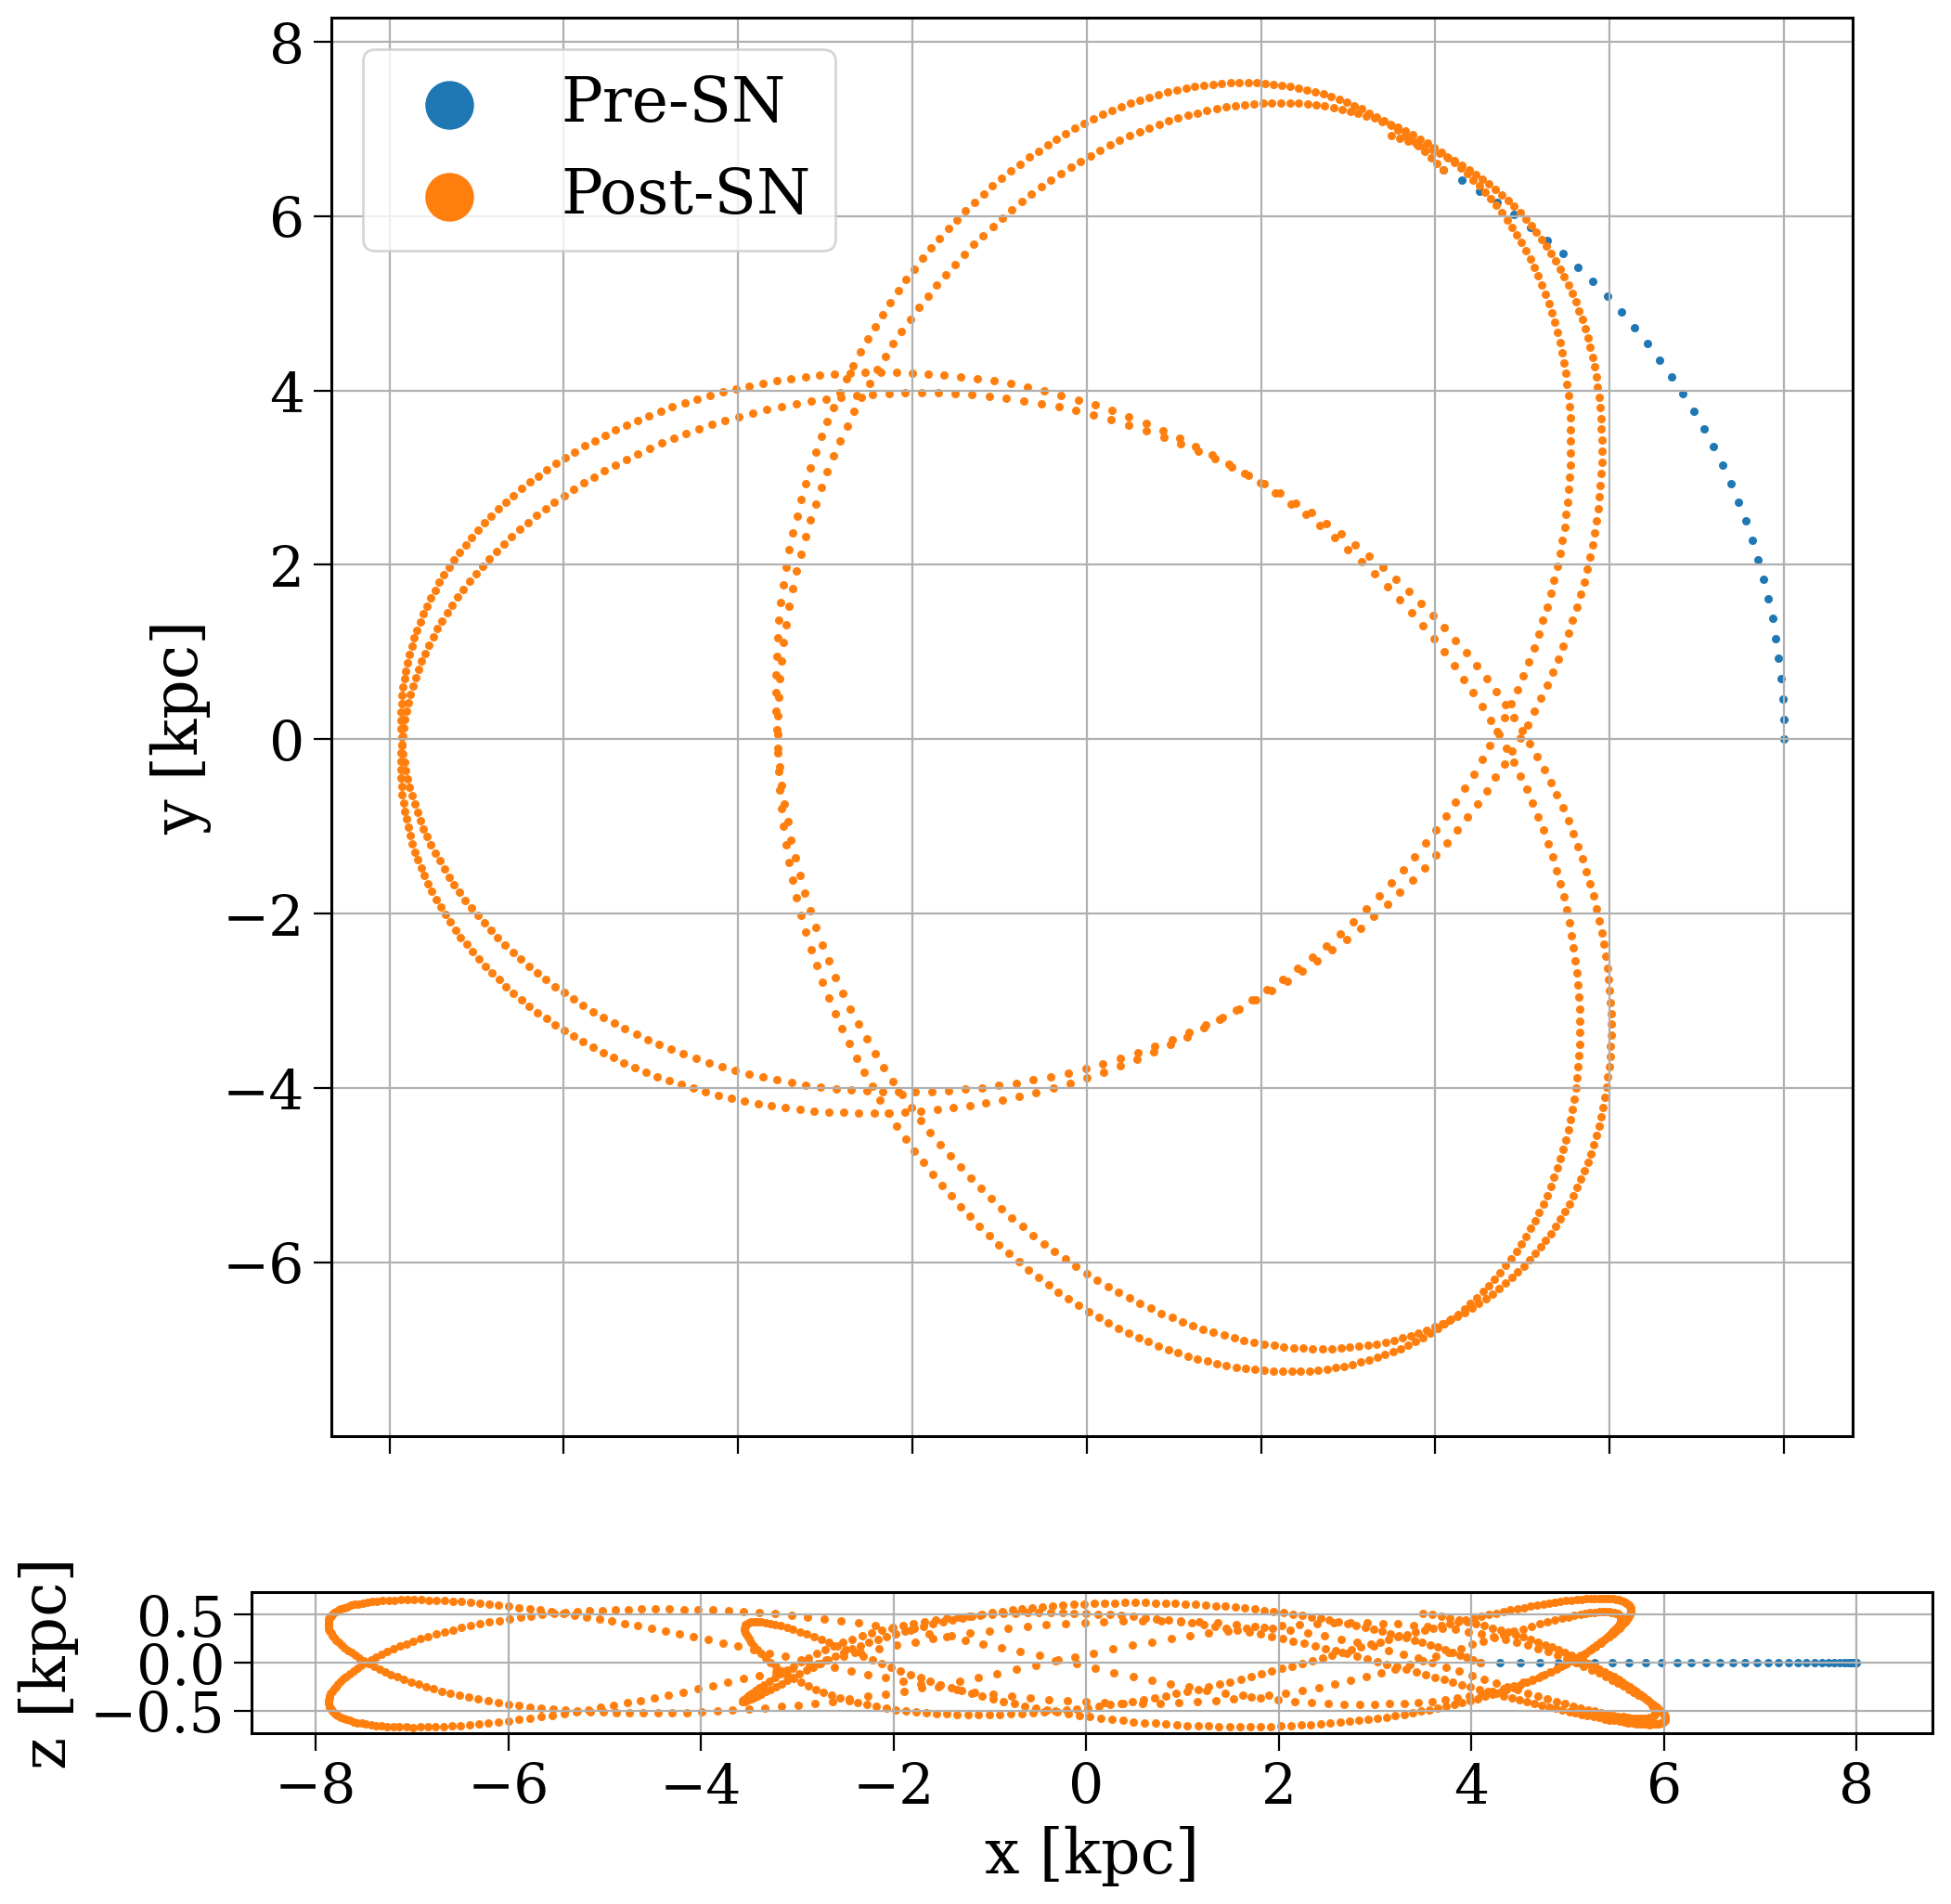

In [47]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [10, 1]}, sharex=True)

s = 5

axes[0].scatter(pre_SN_orbit.q.x, pre_SN_orbit.q.y, s=s, label="Pre-SN")
axes[0].scatter(post_SN_orbit.q.x, post_SN_orbit.q.y, s=s, label="Post-SN")

axes[1].scatter(pre_SN_orbit.q.x, pre_SN_orbit.q.z, s=s)
axes[1].scatter(post_SN_orbit.q.x, post_SN_orbit.q.z, s=s)

for ax in axes:
    ax.set_aspect("equal")
    ax.grid()

# axes[0].scatter(w_SN.q.x.value, w_SN.q.y.value, s=100, color="black", marker="*")
# axes[1].scatter(w_SN.q.x.value, w_SN.q.z.value, s=100, color="black", marker="*")
axes[0].legend(markerscale=8)

axes[1].set_xlabel("x [kpc]")
axes[0].set_ylabel("y [kpc]")
axes[1].set_ylabel("z [kpc]")

plt.show()

## Actual galax plotting

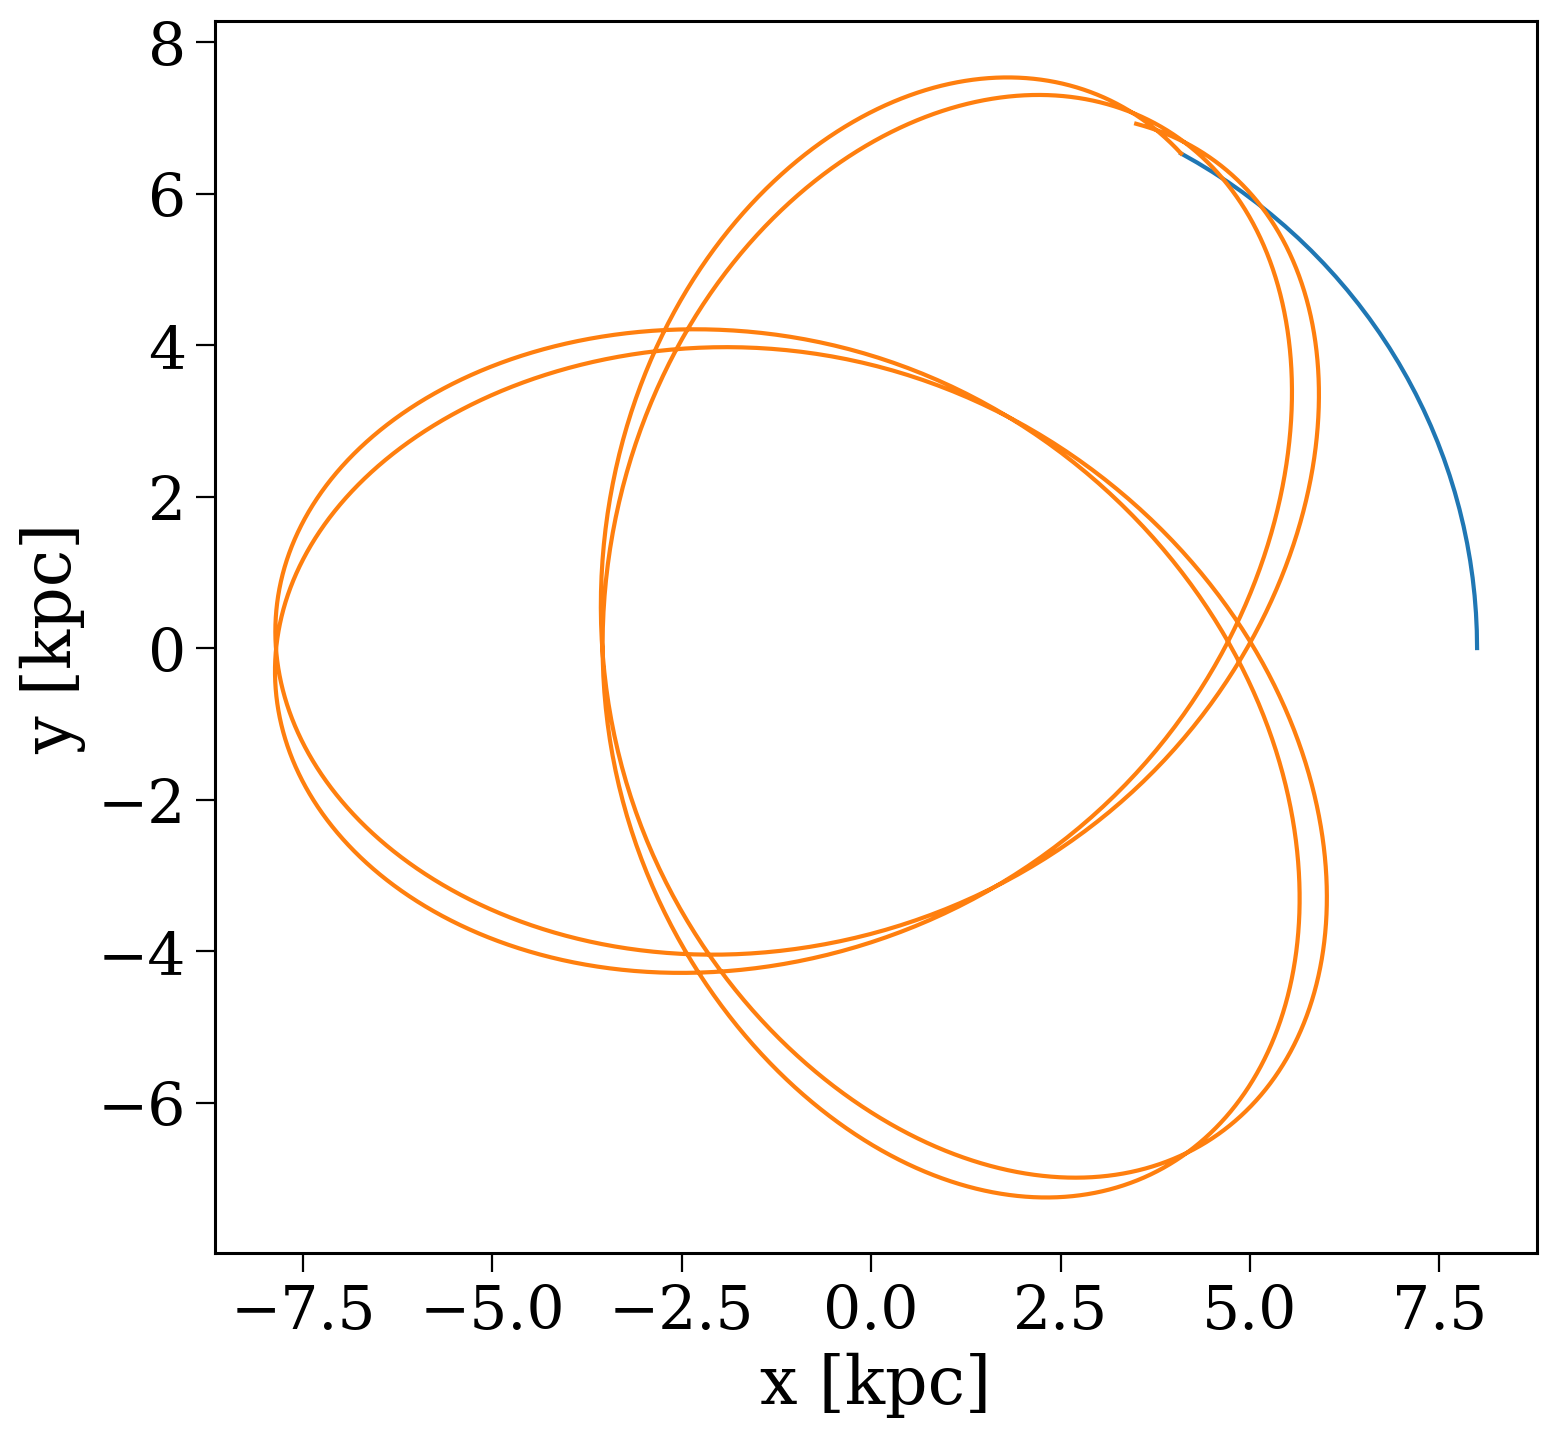

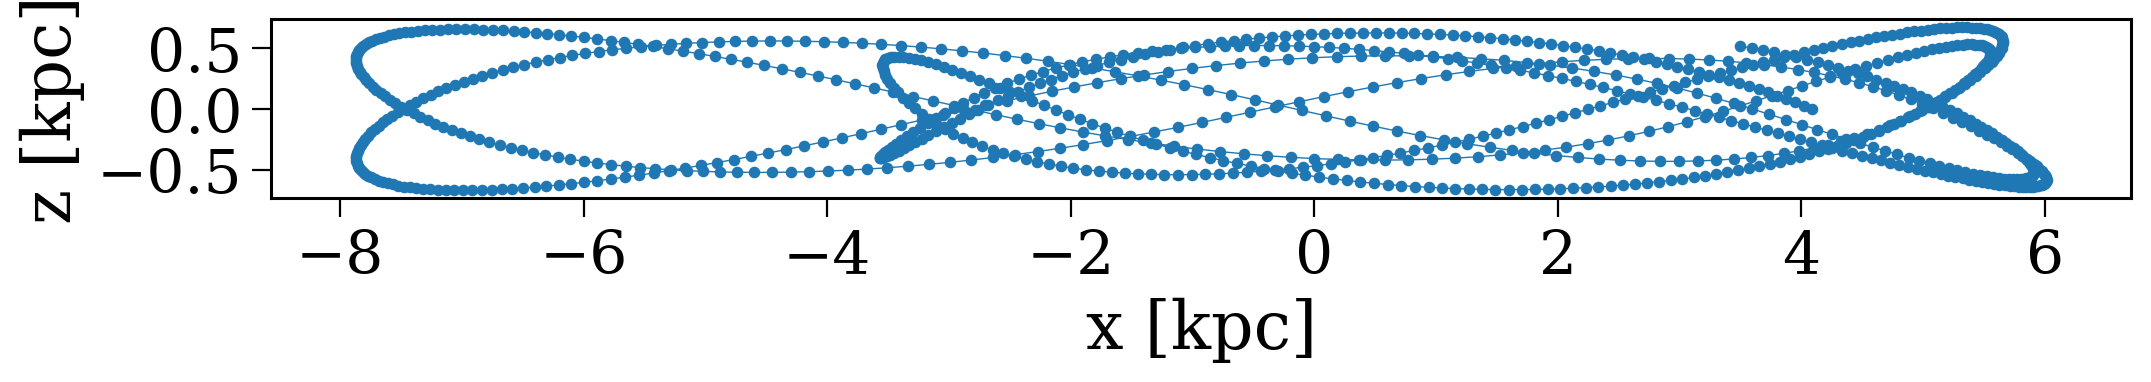

In [43]:
# or not
ax = pre_SN_orbit.plot(x='x', y='y')
ax = post_SN_orbit.plot(x='x', y='y', ax=ax)
ax.set_aspect("equal")
ax = post_SN_orbit.plot(x="x", y='z', plot_function='plot', lw=0.5, zorder=-1)
post_SN_orbit.plot(x="x", y='z', plot_function='scatter', s=10, ax=ax)
ax.set_aspect("equal")